 <font size="6"><b>Принятие решений в бизнесе</b></font><br />

 <font size="5"><b>Часть 1. Приоритизация гипотез.</b></font><br />

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Цель - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Предоставлен датасет `/datasets/hypothesis.csv` со следующими данными:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

### Загрузка данных и подготовка их к анализу

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data.columns = data.columns.str.lower() # преобразуем имена столбцов в нижний регистр

In [5]:
print(*data['hypothesis'], sep='\n') # список гипотез

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Запустить собственную службу доставки, что сократит срок доставки заказов
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Запустить акцию, дающую скидку на товар в день рождения


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Вывод:** данные в датасете после преобразования названий столбцов пригодны для анализа. Параметры фреймворков представлены в шкалах от 0 до 10, где 0 наименее трудозатратные измерения, а 10 - наиболее трудозатратные.

### Применение фреймворка ICE для приоритизации гипотез

In [7]:
# вывод на экран полного содержимого df
pd.options.display.max_colwidth = 0
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'], 2)
print(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

In [8]:
top3_ice = data.sort_values(by='ICE', ascending=False).head(3)

In [9]:
print('Наиболее приоритетные гипотезы:', top3_ice[['hypothesis']])

Наиболее приоритетные гипотезы:                                                                                            hypothesis
8  Запустить акцию, дающую скидку на товар в день рождения                                           
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  


### Применение фреймворка RICE для приоритизации гипотез

In [10]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

In [11]:
top3_rice = data.sort_values(by='RICE', ascending=False).head(3)

In [12]:
print('Наиболее приоритетные гипотезы:', top3_rice[['hypothesis']])

Наиболее приоритетные гипотезы:                                                                                                      hypothesis
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок            
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей          


**Вывод:** оценки приоритизации ICE и RICE схожи, отличие последней в том, что она учитывает количество пользователей (Reach), которое затронет изменение. Порядок приоритизации гипотез по значимости (7-ая гипотеза в RICE вместо 8-ой в ICE) поменялся в RICE потому, что в ее формуле в числителе появился Reach, равный 10 для 7-ой гипотезы, т.е. гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" вовлечет всех пользователей интерент-магазина, что в конечном итоге максимизирует возможно ожидаемое улучшение ключевых метрик.

 <font size="5"><b>Часть 2. Анализ A/B-теста</b></font><br />

A/B-тест проведен и получены результаты, которые описаны в файлах:

`/datasets/orders.csv`

`/datasets/visitors.csv`

**Цель исследования** - по итогам теста принять одно из следующих решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**План исследования**

1. Загрузка данных и подготовка их анализу

2. График кумулятивной выручки по группам

3. График кумулятивного среднего чека по группам
    
4. График относительного изменения кумулятивного среднего чека группы B к группе A

5. График кумулятивного среднего количества заказов на посетителя по группам

6. Точечный график количества заказов по пользователям

7. 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

8. Точечный график стоимостей заказов

9. 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

10. Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

14. Итоги по результатам теста

### Загрузка данных и подготовка их к анализу

In [13]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [14]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
# преобразуем дату к формату datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
# проверка на вхождение одних и тех же пользователей в разные группы
users_groups_dubl = orders.groupby('visitorId').agg({'group': 'nunique'})

In [18]:
# кол-во вхождений одних и тех же пользователей в две группы
users_groups_dubl.value_counts()

group
1        973
2        58 
dtype: int64

In [19]:
# пользователи, находящиеся одновременно в разных группах
users_groups_dubl.query('group == 2').head(5)

,group
visitorId,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2


In [20]:
# смотрим на первого пользователя
orders.query('visitorId == 8300375')

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


In [21]:
# заменим названия групп у этих пользователей на первую по регистрации группы

for t in users_groups_dubl.index:
    orders.loc[(orders['visitorId'] == t), 'group'] = \
    orders.query('visitorId == @t')['group'][orders.query('visitorId == @t').index.min()]    

In [22]:
# проверка на первом пользователе
orders.query('visitorId == 8300375')

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,B


In [23]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [24]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [25]:
# преобразуем дату к формату datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [26]:
len(orders)-len(orders.drop_duplicates ()) # кол-во дубликатов

0

In [27]:
orders.isna().sum() # кол-во пропусков

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [28]:
len(visitors)-len(visitors.drop_duplicates ()) # кол-во дубликатов

0

In [29]:
visitors.isna().sum() # кол-во пропусков

date        0
group       0
visitors    0
dtype: int64

**Вывод:** данные в двух датасетах после преобразований пригодны для анализа.

### График кумулятивной выручки по группам

In [30]:
# массив уникальных пар: дата - группа теста
datesGroups = orders[['date','group']].drop_duplicates()

In [31]:
# агрегированные кумулятивные данные о заказах по дням
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [32]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,22,21,107017
175,2019-08-02,A,43,37,237869
173,2019-08-02,B,46,43,271280
291,2019-08-03,A,67,61,350342
...,...,...,...,...,...
496,2019-08-29,B,595,517,5398449
730,2019-08-30,A,549,467,4189929
690,2019-08-30,B,616,538,5607672
958,2019-08-31,A,558,475,4258672


In [33]:
# агрегированные кумулятивные данные о посетителях по дням
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [34]:
# объединением кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# переименовываем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     22      21      107017   713     
2 2019-08-02  A     43      37      237869   1338    
3 2019-08-02  B     46      43      271280   1294    
4 2019-08-03  A     67      61      350342   1845    


In [35]:
orders.duplicated().sum()

0

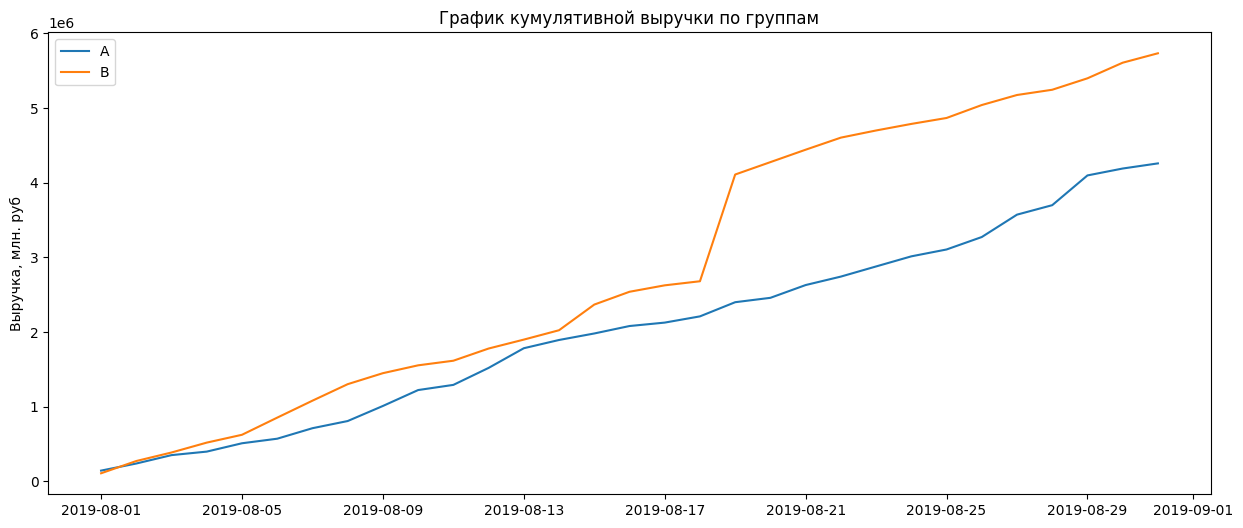

In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,6))
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка, млн. руб")

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(); 

**Вывод:** Выручка растет в течение всего времени теста у обеих групп. Но во второй половине месяца у группы В наблюдается резкий кратковременный скачок выручки, что может свидетельствовать о всплесках заказов или появлении дорогих покупок у отдельных клиентов. 

### График кумулятивного среднего чека по группам

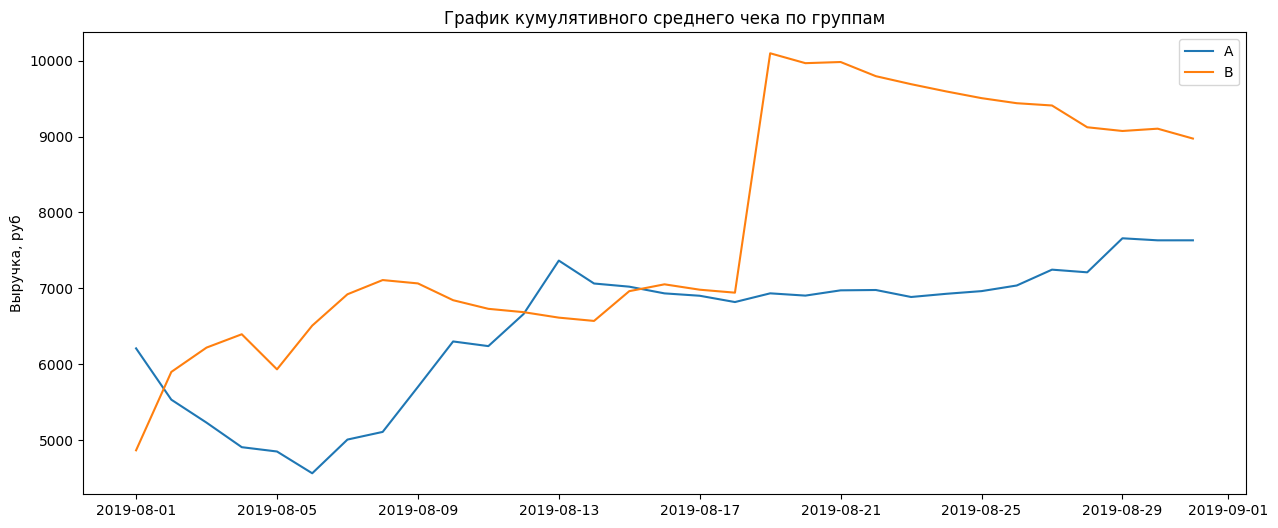

In [37]:
# средний кумулятивный чек = кумулятивная выручка / кумулятивное число заказов
plt.figure(figsize=(15,6))
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка, руб")

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

**Вывод:** средний чек в обеих группах в первой половине месяца довольно нестабильный в обеих группах, но затем становится равномерным по мере появления бОльшего кол-ва наблюдений (т.е. согласно ЦПТ кумулятивные метрики стремятся к своему среднему значению): для группы А он медленно растет, а для группы B стабильно падает. Во второй половине месяца наблюдается резкий скачок среднего чека для группы В (точно попали дорогие заказы, т.к. кол-во заказов - в знаменателе), это повлияло на общую картину анализа к концу месяца, когда средние чеки стабилизировались. Это явление нужно будет исследовать отдельно.

### График относительного изменения кумулятивного среднего чека группы B к группе A

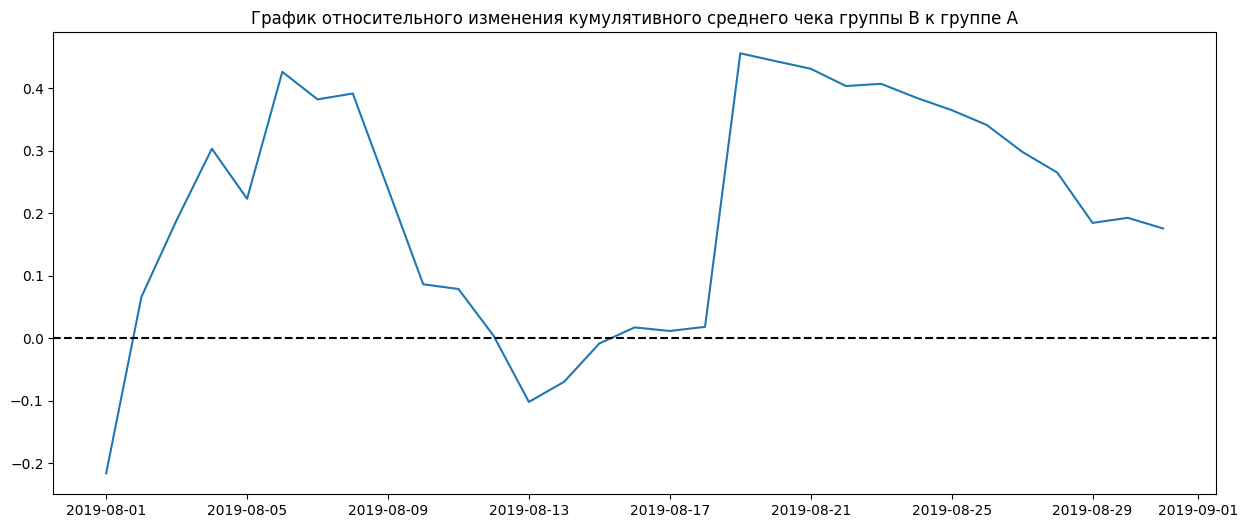

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', \
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(15,6))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
        (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** В некоторых датах есть резкие скачки, которые говорят об очень больших различиях в средних чеках в группе В по сравнению с группой А. Скорее всего это влияние дорогих покупок отдельных клиентов на усредненные покупки обычных клиентов.

### График кумулятивного среднего количества заказов на посетителя по группам

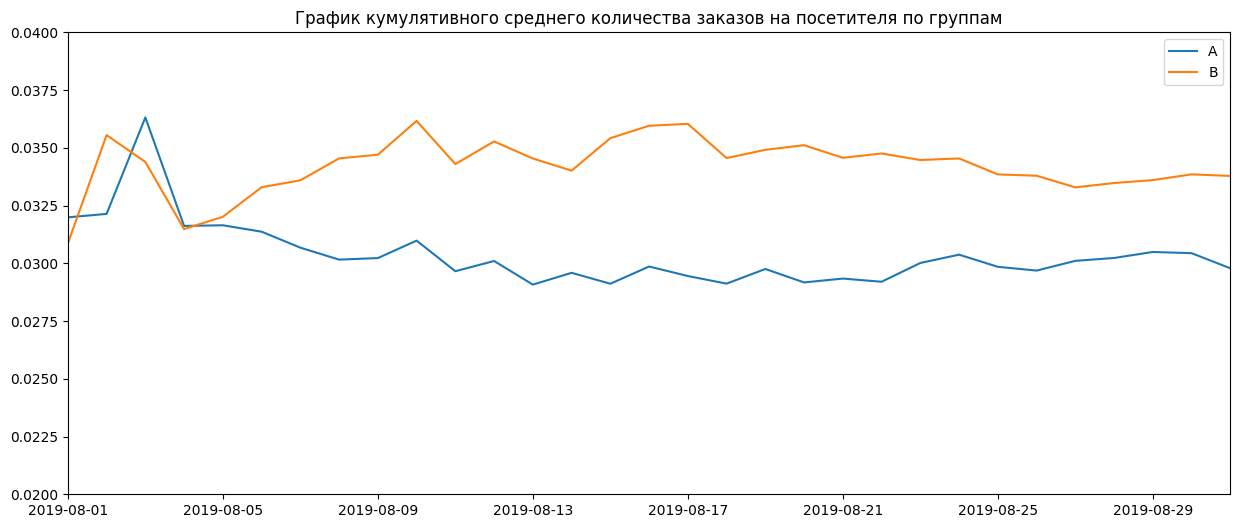

In [39]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,6))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), 0.02, 0.04]);

**Вывод:** По графику первые дни месяца была нестабильная почти симметричная кумулятивная конверсия у обеих групп и группа А была даже лучше по этому показателю на посетителя. Однако, спустя несколько дней, группа B вырвалась вперед, затем графики стабилизировались, сохранив лидирующее положение группы B. При этом у группы В среднее кумулятивное число кол-ва заказов падает, а у группы А - растет.

То есть, по группе B по кумулятивным данным выявлено **2 факта:**
1. бОльшее среднее число заказов в первой половине месяца, но со временем они падают.
2. есть дорогие заказы во второй половине месяца, но средний чек со временем падает.

Для группы А все наоборот.

В целом отношение конверсии еще не установилось, по имеющимся данным пока нельзя сделать окончательные выводы.

### Точечный график количества заказов по пользователям

In [40]:
# количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


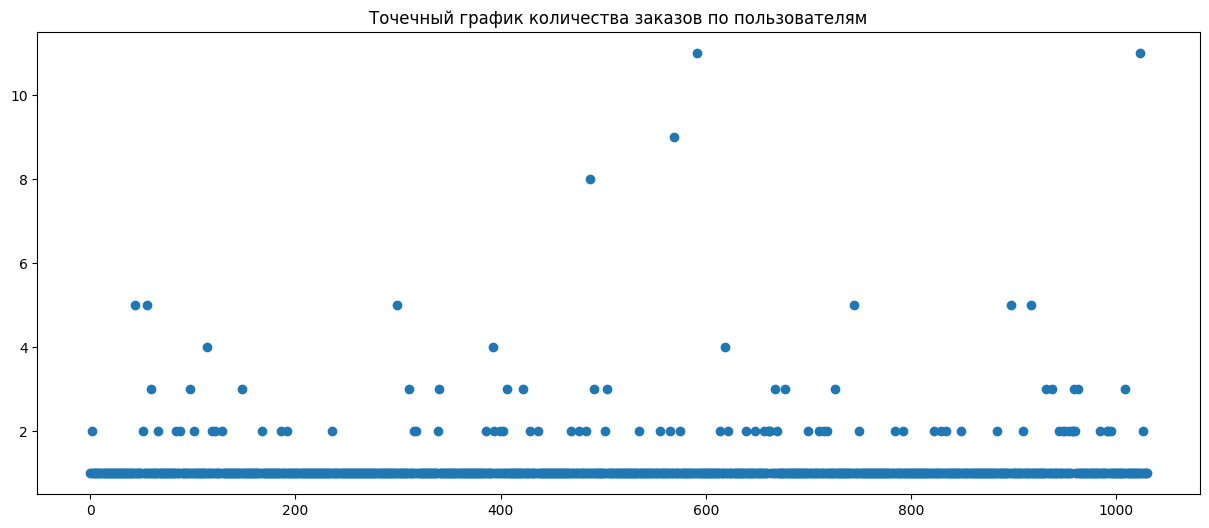

In [41]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,6))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']);

**Вывод:**  Из точечного графика видно, что основная масса покупателей ограничивается одним заказом, редко двумя-тремя, остальная доля приходится на четырьмя и более, в том числе в выборке есть явно аномальные заказы - больше пяти.  

### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [42]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


**Вывод:** в статистических исследования принято отсеивать 1-5% аномальных значений, т.е. в нашем исследовании не более 5% пользователей сделали больше 2 заказов и не более 1% пользователей сделали больше 4 заказов. Разумно выбрать верхней границей меньше 4 заказов, чтобы исключить меньше пользователей из анализа.

### Точечный график стоимостей заказов

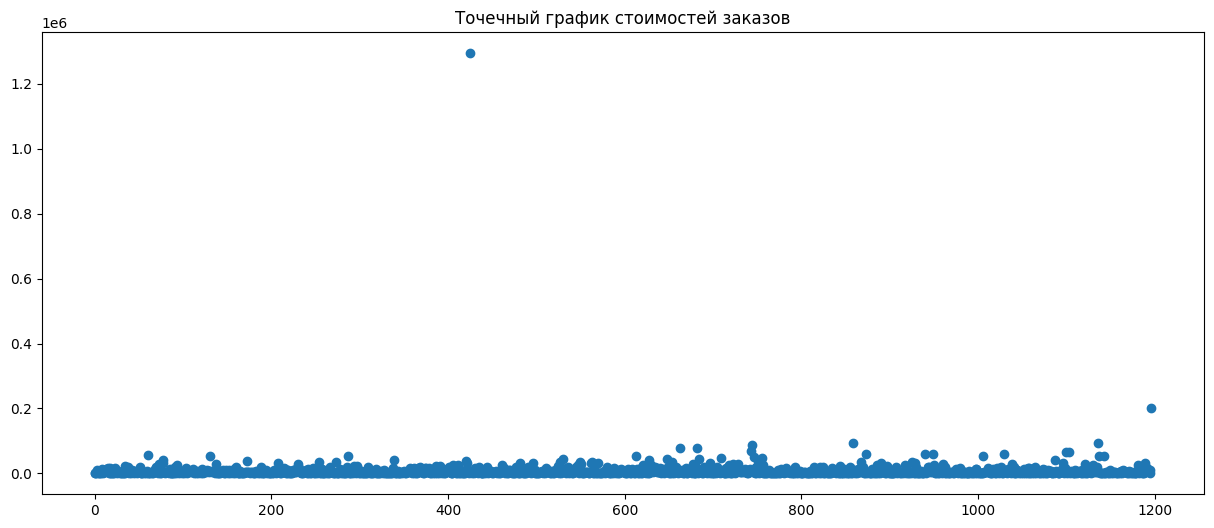

In [43]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,6))
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue']);

In [44]:
# самые дорогие заказы
orders[['revenue', 'date']].sort_values(by='revenue', ascending=False).head(5)

,revenue,date
425,1294500,2019-08-19
1196,202740,2019-08-15
858,93940,2019-08-27
1136,92550,2019-08-13
744,86620,2019-08-27


**Вывод:** Основная доля заказов приходится на сумму до 30 тыс руб. Кроме этого на графике виден самый дорогой аномальный заказ, сделанный во второой половине месяца, который вызвал вспеск заказов в соответсвующем кумулятивном графике выше.

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [45]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:** не больше 5% заказов сделано на сумму свыше 28 тыс руб и не больше 1% заказов сделано на сумму свыше 58 тыс руб. С целью минимизации потерь наблюдений будем считать заказаы свыше 58 тыс руб аномальными.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Чтобы посчитать статистическую значимость различий в среднем числе заказов на пользователя по «сырым» данным воспользуемся критерием Манна-Уитни. Он позволяет выявлять различия в значении параметра между малыми выборками.
Для расчета подготовим данные.

In [46]:
# отделим из исх. данных кол-во пользователей по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кумулятивное кол-во посетителей по дням в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].
    agg({'date': 'max', 'visitorsPerDateA': 'sum'}),
                                             axis=1)

# переименовываем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# отделим из исх. данных кол-во пользователей по дням в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# кумулятивное кол-во посетителей по дням в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].
    agg({'date': 'max', 'visitorsPerDateB': 'sum'}),
                                             axis=1)

# переименовываем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']



# кол-во заказов и суммарная выручка по ним на каждый день для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
                )
# переименовываем столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кумулятивные кол-во заказов и суммарная выручка по ним на каждый день для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].
    agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),
                                         axis=1).sort_values(by=['date'])


# переименовываем столбцы
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# кол-во заказов и суммарная выручка по ним на каждый день для группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
                )
# переименовываем столбцы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кумулятивные кол-во заказов и суммарная выручка по ним на каждый день для группы B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].
    agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),
                                        axis=1).sort_values(by=['date'])

# переименовываем столбцы
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']



# объединяем таблицы
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  23              142779           22               
1 2019-08-02  20              95090            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  14              47016            19               
4 2019-08-05  24              111753           24               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  107017           23                  142779                
1  164263           43                  237869                
2  114248           67                  350342                
3  132380           81                  397358                
4  104893           105                 509111                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  22                  107017               719                
1  46                  271280               619                
2  62                  385528         

Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Для этого создадим переменные для каждой группы, где пользователи делали хотя бы один заказ.

In [47]:
# пользователи группы А, которые делали хотя бы один заказ
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

# пользователи группы B, которые делали хотя бы один заказ
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Введем новые переменные `sampleA` и `sampleB` для каждой группы, где каждому пользователю будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Эти переменные нужны для расчета выборок критерием Манна-Уитни.

In [48]:
sampleA = pd.concat(
                    [ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                    name='orders')],axis=0)

sampleB = pd.concat(
                    [ordersByUsersB['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                    name='orders')], axis=0)

Сформулируем гипотезы.

- **H0:** различий в среднем количестве заказов между группами нет.
- **H1:** различия в среднем количестве заказов между группами есть.

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)) # относительный выигрыш группы В

0.017
0.134


**Вывод:** p-value=0.017 меньше уровня значимости 0.05, отвергаем нулевую гипотезу в пользу альтернативной гипотезы, т.е. различия в среднем числе заказов на посетителя есть. Относительный выигрыш группы B равен 13.4%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

Сформулируем гипотезы:

- **H0:** различий в среднем чеке между группами нет.
- **H1:** различия в среднем чеке между группами есть.

In [50]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                          orders[orders['group']=='B']['revenue'])[1]))

0.646


**Вывод:** p-value=0.646 больше 0.05. Следовательно различий в среднем чеке между группами нет.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сначала посчитаем количество аномальных пользователей. Как было раньше выявлено в исследовании аномальными пользователями считаются пользователи, совершившие больше 4 заказов или оформившие заказы дороже 58233 руб.

Сделаем срезы по ним.

In [51]:
# пользователи по группам с аномальным кол-вом заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorId'],
    ],
    axis=0,
)

# пользователи по группам с аномальными суммами заказов
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorId']

# соединяем датафреймы, удаляя дубликаты
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
11


Всего 15 аномальных пользователей. Для того, чтобы применить критерий Уитни-Манна и узнать сохранились ли различия в группах, необходимо подготовить выборки количества заказов по пользователям по группам теста.

In [52]:
# "очищенная" группа А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# "очищенная" группа B
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы.

- **H0:** различий в среднем количестве заказов по "очищенным" данным между группами нет.
- **H1:** различия в среднем количестве заказов по "очищенным" данным между группами есть.

In [53]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.012
0.145


**Вывод:** p-value=0.012, отвергаем нулевую гипотезу в пользу альтернативной гипотезы, т.е. различия в среднем числе заказов на посетителя есть. Результаты по среднему количеству заказов практически не изменились (0.017 по "сырым" данным). Относительный выигрыш гуппы В в среднем кол-ве заказов на посетителя по сравнению с группой А составил 14.5%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:

- **H0:** различий в среднем чеке по "очищенным" данным между группами нет.
- **H1:** различия в среднем чеке по "очищенным" данным между группами есть.

In [54]:
print(
    '{0:.3f}'.format(stats.mannwhitneyu(
                                        orders[np.logical_and(orders['group'] == 'A',
                                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                                        orders[np.logical_and(orders['group'] == 'B',
                                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
                    )
       )

0.796


**Вывод:** p-value=0.796 больше 0.05. Следовательно различий в среднем чеке между группами нет. Результаты по среднему чеку мало изменились (0.646 по "сырым" данным).

### Итоги по результатам теста

**В ходе исследования выявлены следующие факты:**

I. Существует статистически значимое различие по среднему количеству заказов между группами по «сырым» и «очищенным» данным;

II. График кумулятивного среднего количества заказов на посетителя по группам сообщает, что для группы B
  - 1. бОльшее среднее число заказов в первой половине месяца, но со временем они падают.
  - 2. есть дорогие заказы во второй половине месяца, но средний чек со временем падает.
  
  Для группы А наоборот:
  - 1. меньшее среднее число заказов в первой половине месяца, но со временем они растут.
  - 2. нет дорогих заказов во второй половине месяца, но средний чек со временем растет.


III. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по «очищенным» данным;

Таким образом, с одной стороны, при одинаковом среднем чеке в обеих группах существует статистически значимое различие в среднем количестве заказов в пользу группы B, т.е. она лучше. Но с другой стороны у группы В со временем среднее число заказов падает вместе со средним чеком, в то время как у группы А эти же показатели растут.

**Вывод:** равновесие по конверсии еще не установилось, необходимо продолжить наблюдения, так как есть вероятность того, что группа B лучше.